In [45]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 301.5 kB/s eta 0:03:58
   ---------------------------------------- 0.5/72.0 MB 301.5 kB/s eta 0:03:58
   ---------------------------------------- 0.5/72.0 MB 301.5 kB/s eta 0:03:58
   ---------------------------------------- 0.5/72.0 MB 301.5 kB/s eta 0:03:58
   ---------------------------------------- 0.

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df=pd.read_excel("online_retail_II.xlsx")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [15]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [16]:
df.info

<bound method DataFrame.info of        Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0 

In [17]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [18]:
# Remove rows with missing Customer ID
df = df.dropna(subset=['Customer ID'])

In [19]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [20]:
# Convert InvoiceDate to datetime
df.loc[:,'InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [21]:
# Remove negative quantities (returns)
df = df[df['Quantity'] > 0]

In [22]:
# Create Total Amount column
df['TotalPrice'] = df['Quantity'] * df['Price']

In [24]:
import datetime as dt

In [25]:
# Reference date (last date in dataset)
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [26]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [27]:
extra = df.groupby('Customer ID').agg({'Quantity': 'sum','TotalPrice': 'mean'})

In [28]:
extra.columns = ['TotalQuantity', 'AvgOrderValue']

In [29]:
customer_df = rfm.merge(extra, on='Customer ID')

In [30]:
customer_df['Churn'] = customer_df['Recency'].apply(lambda x: 1 if x > 90 else 0)

In [36]:
# Split data by time

In [31]:
cutoff_date = df['InvoiceDate'].max() - dt.timedelta(days=90)

In [33]:
cutoff_date

Timestamp('2010-09-10 20:01:00')

In [34]:
past = df[df['InvoiceDate'] <= cutoff_date]
past

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
334838,522068,22197,SMALL POPCORN HOLDER,5,2010-09-10 17:19:00,0.85,16549.0,United Kingdom,4.25
334839,522068,22398,MAGNETS PACK OF 4 SWALLOWS,2,2010-09-10 17:19:00,1.25,16549.0,United Kingdom,2.50
334840,522068,22403,MAGNETS PACK OF 4 VINTAGE LABELS,2,2010-09-10 17:19:00,1.25,16549.0,United Kingdom,2.50
334841,522068,22329,ROUND CONTAINER SET OF 5 RETROSPOT,2,2010-09-10 17:19:00,1.65,16549.0,United Kingdom,3.30


In [35]:
future = df[df['InvoiceDate'] > cutoff_date]
future

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
334843,522069,22087,PAPER BUNTING WHITE LACE,4,2010-09-12 10:18:00,2.95,18260.0,United Kingdom,11.80
334844,522070,46000M,POLYESTER FILLER PAD 45x45cm,5,2010-09-12 10:30:00,1.55,17377.0,United Kingdom,7.75
334845,522070,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,5,2010-09-12 10:30:00,2.55,17377.0,United Kingdom,12.75
334846,522070,21485,RED SPOT HEART HOT WATER BOTTLE,5,2010-09-12 10:30:00,4.95,17377.0,United Kingdom,24.75
334847,522070,22659,LUNCH BOX I LOVE LONDON,3,2010-09-12 10:30:00,1.95,17377.0,United Kingdom,5.85
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [37]:
future_revenue = future.groupby('Customer ID')['TotalPrice'].sum()
customer_df = customer_df.merge(future_revenue,on='Customer ID',how='left')

In [38]:
customer_df.rename(columns={'TotalPrice': 'FutureRevenue'}, inplace=True)

customer_df['FutureRevenue'] = customer_df['FutureRevenue'].fillna(0)

In [39]:
X = customer_df.drop(['Churn', 'FutureRevenue'], axis=1)
X

,Recency,Frequency,Monetary,TotalQuantity,AvgOrderValue
Customer ID,,,,,
12346.0,165,11,372.86,70,11.298788
12347.0,3,2,1323.32,828,18.638310
12348.0,74,1,222.16,373,11.108000
12349.0,43,3,2671.14,993,26.187647
12351.0,11,1,300.93,261,14.330000
...,...,...,...,...,...
18283.0,18,6,641.77,336,2.790304
18284.0,67,1,461.68,494,16.488571
18285.0,296,1,427.00,145,35.583333


In [40]:
y_class = customer_df['Churn']          # For Classification
y_reg   = customer_df['FutureRevenue']  # For Regression

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [43]:
_, _, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

In [46]:
from xgboost import XGBClassifier

In [72]:
xgb_clf = XGBClassifier(n_estimators=100,learning_rate=0.1
                        ,max_depth=4,random_state=42)
xgb_clf.fit(X_train, y_train_c)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [69]:
pred_c = xgb_clf.predict(X_test) 

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classsification Report:\n",classification_report(y_test_c, pred_c))
cm=confusion_matrix(y_test_c, pred_c)
print("Confusion Matrix:\n",cm)

Classsification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       1.00      1.00      1.00       290

    accuracy                           1.00       863
   macro avg       1.00      1.00      1.00       863
weighted avg       1.00      1.00      1.00       863

Confusion Matrix:
 [[572   1]
 [  1 289]]


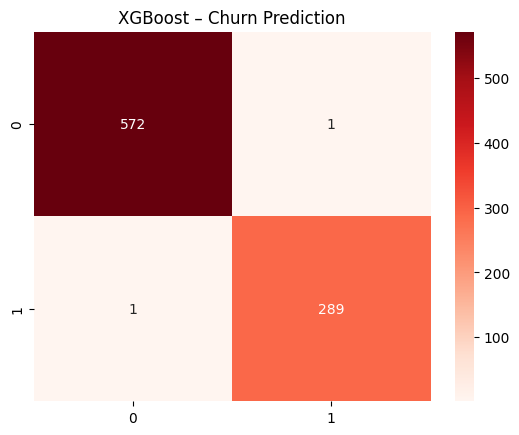

In [57]:
sns.heatmap(cm, annot=True, fmt='d',cmap="Reds")
plt.title("XGBoost – Churn Prediction")
plt.show()

In [58]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [59]:
xgb_reg = XGBRegressor(n_estimators=100,learning_rate=0.1,
                       max_depth=4,random_state=42)
xgb_reg.fit(X_train, y_train_r)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_met

In [71]:
pred_r = xgb_reg.predict(X_test)

In [61]:
print("MAE:", mean_absolute_error(y_test_r, pred_r))
print("R2 Score:", r2_score(y_test_r, pred_r))

MAE: 485.9997933383927
R2 Score: 0.3997804298366001


In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

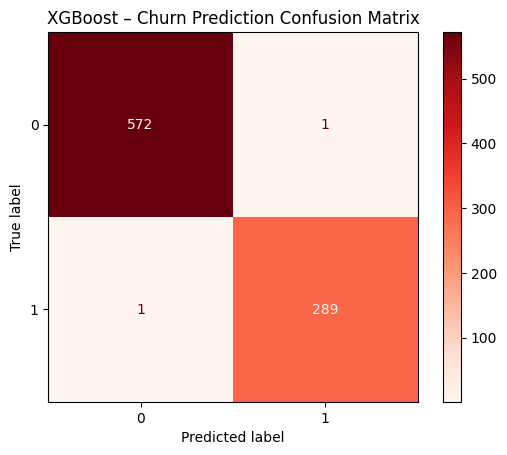

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test_c, 
                                    pred_c,cmap="Reds")
plt.title("XGBoost – Churn Prediction Confusion Matrix")
plt.show()

<Figure size 800x600 with 0 Axes>

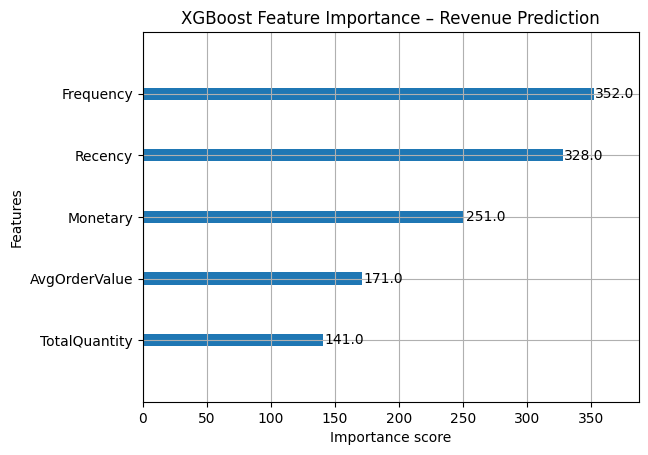

In [66]:
from xgboost import plot_importance
plt.figure(figsize=(8,6))
plot_importance(xgb_reg)
plt.title("XGBoost Feature Importance – Revenue Prediction")
plt.show()


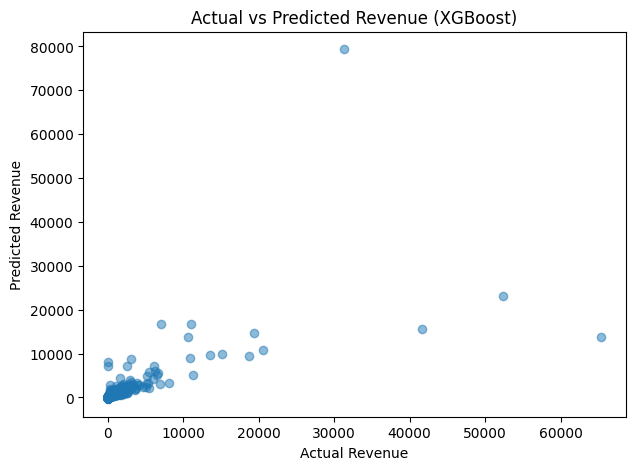

In [67]:
plt.figure(figsize=(7,5))
plt.scatter(y_test_r, pred_r, alpha=0.5)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue (XGBoost)")
plt.show()

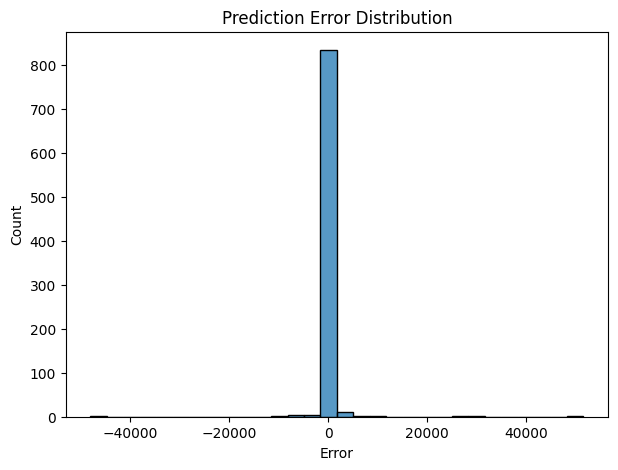

In [68]:
errors = y_test_r - pred_r

plt.figure(figsize=(7,5))
sns.histplot(errors, bins=30)
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.show()